# <b><center> BUILD LOGISTIC REGRESSION FOR MEDICAL DATA </center></b>


## STEP 1: READ AND ANALYSE DATA

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_excel("DataSet.xlsx")
dataset.head()

,qd,gos,training2,creadit3,capital,gender,experience,age,education
0,0,0,1,1,1.5,0,8,45,5
1,0,0,1,0,0.3,0,1,29,12
2,0,0,0,0,9.0,1,5,35,18
3,1,0,1,0,9.5,1,12,56,10
4,0,0,0,0,13.0,1,8,50,32


In [4]:
print(f"Number of observation: {len(dataset)}")
print("Count number of value in data:")
display(dataset[["qd","gos","training2","creadit3"]].apply(pd.Series.value_counts))

Number of observation: 404
Count number of value in data:


,qd,gos,training2,creadit3
0,302,356,153,291
1,102,48,251,113


In [7]:
corr = dataset.corr()
print("Correlation coefficient:")
corr.style.background_gradient(cmap='coolwarm')

Correlation coefficient:


,qd,gos,training2,creadit3,capital,gender,experience,age,education
qd,1.000000,0.173997,0.124846,0.120214,0.133511,-0.011178,0.132761,0.070973,0.125587
gos,0.173997,1.000000,-0.091814,0.026830,0.039671,0.014554,0.047981,0.062631,-0.015358
training2,0.124846,-0.091814,1.000000,-0.002336,-0.069471,-0.025838,-0.064422,-0.066090,-0.056247
creadit3,0.120214,0.026830,-0.002336,1.000000,-0.067545,-0.080161,-0.041834,-0.066507,0.029496
capital,0.133511,0.039671,-0.069471,-0.067545,1.000000,-0.015562,0.239927,0.189626,0.151044
gender,-0.011178,0.014554,-0.025838,-0.080161,-0.015562,1.000000,-0.039347,-0.029268,0.010658
experience,0.132761,0.047981,-0.064422,-0.041834,0.239927,-0.039347,1.000000,0.826357,0.134136
age,0.070973,0.062631,-0.066090,-0.066507,0.189626,-0.029268,0.826357,1.000000,0.167201
education,0.125587,-0.015358,-0.056247,0.029496,0.151044,0.010658,0.134136,0.167201,1.000000


## STEP 2: DIVIDE INTO TRAINING AND TESTING SET 
## WITH 80% TRAINING AND 20% TESTING

In [95]:
# input
x = dataset.iloc[:, [1,2,3,4,5,6,7,8]].values

# output
y = dataset.iloc[:,0].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## STEP 3: BUILD LOGISTIC REGRESSION MODEL WITH CONDITION AND MODEL RUSULT

## INFO ABOUT VARIABLES:
<b>x1 = GOS</b>

<b>x2 = training2</b>

<b>x3 = creadit3</b>

<b>x4 = capital</b>

<b>x5 = gender</b>

<b>x6 = experience</b>

<b>x7 = age</b>

<b>x8 = education</b>

qd = x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8

## Run LOOP till satistfied the condition:
x3 > 0 and |z| < 1.96

x5 > 0 and |z| > 1.96

In [97]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit(disp=0)
#display(result.summary())


while(True):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    logit_model = sm.Logit(y_train,X_train)
    result = logit_model.fit(disp=0)
    
    x3ZValue = result.tvalues[2]
    x5ZValue = result.tvalues[4]

    x3Coef = result.params[2]
    x5Coef = result.params[4]
    if((abs(x3ZValue) > 1.96 and abs(x5ZValue) < 1.96 ) and (x3Coef > 0 and x5Coef >0)):
        display(result.summary())
        break

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  323
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                 0.09166
Time:                        01:53:34   Log-Likelihood:                -169.09
converged:                       True   LL-Null:                       -186.16
Covariance Type:            nonrobust   LLR p-value:                 1.632e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1718      0.372      3.150      0.002       0.443       1.901
x2             0.6238      0.281      2.224      0.026       0.074       1.174
x3             0.6780      0.280      2.419      0.016       0.129       1.227
x4             0.0440      0.036      1.221      0.222      -0.027       0.115
x5             0.1668      0.266      0.626      0.531      -0.355       0.689
x6             0.2899      0.069      4.224      0.000       0.155       0.424
x7            -0.1047      0.017     -6.190      0.000      -0.138      -0.072
x8             0.0548      0.023      2.349      0.019       0.009       0.100
==============================================================================
"""

## STEP 4: MODEL EVALUATION

### TESTING ACCURACY

In [98]:
from sklearn.metrics import accuracy_score
ResultList = []
for i in X_test:
    predict = result.predict(i)
    if(predict >= 0.5):
        ResultList.append(1)
    else:
        ResultList.append(0)
print ("Accuracy : ", accuracy_score(y_test, ResultList))

Accuracy :  0.7901234567901234


### Confusion matrix

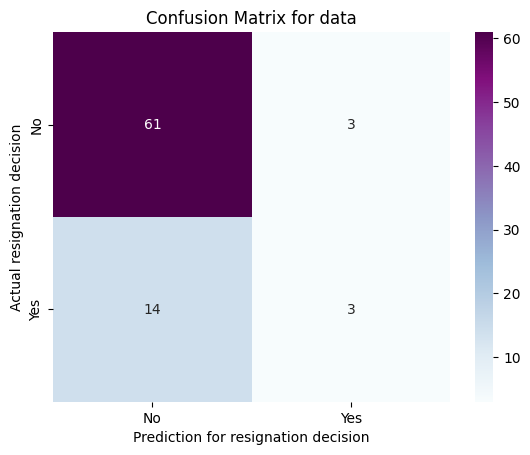

In [143]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

qd = confusion_matrix(y_test, ResultList)
# qd = pd.DataFrame(qd)
#display("Confusion Matrix : \n", qd)

ax = sns.heatmap(qd, annot=True, cmap="BuPu")
ax.set_title("Confusion Matrix for data");
ax.set_xlabel("Prediction for resignation decision")
ax.set_ylabel('Actual resignation decision');
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()